# Test

Import usefull packages + the njord library. For installations details please refer to README file. 

In [1]:
import njord as nj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hyper parameters

In [2]:
PATH = "../dataset"
SYMBOL = "btcusdt"
FILENAME = "dataset_binance_{}_period_600.csv".format(SYMBOL)
LOOKBACK = 8
LOOKUP = 1

## Dataset

Load the dataset from .csv file to a pandas dataframe.

In [3]:
dataset = pd.read_csv(PATH + "/" + FILENAME)
dataset = dataset.set_index("time")
dataset.index = pd.to_datetime(dataset.index)

In [4]:
print("Dataset size = \n{}".format(dataset.size))
print("Dataset head = \n{}".format(dataset.head()))

Dataset size = 
11748
Dataset head = 
                     open_price_#t  high_price_#t  low_price_#t  \
time                                                              
2018-10-01 00:10:00        6626.57        6649.00       6622.13   
2018-10-01 00:20:00        6645.21        6648.00       6632.59   
2018-10-01 00:30:00        6640.03        6655.00       6638.98   
2018-10-01 00:40:00        6643.43        6653.33       6638.78   
2018-10-01 00:50:00        6650.00        6653.70       6641.30   

                     close_price_#t  avg_price_#t  sum_qty_diff_norm_#n  
time                                                                     
2018-10-01 00:10:00         6645.20   6639.074520              0.270180  
2018-10-01 00:20:00         6640.03   6639.989762              0.216486  
2018-10-01 00:30:00         6643.41   6648.777817              0.536584  
2018-10-01 00:40:00         6648.80   6644.145194             -0.020611  
2018-10-01 00:50:00         6645.02   6646.06837

## Batch

We now have to build the batch, i.e. a feature array X with its associated targets Y. 

In [5]:
batch = nj.Batch(dataset, 8, 1)

In [42]:
X, Y = batch.build(center=False)
print("X shape = {}".format(X.shape))
print("Y shape = {}".format(Y.shape))

X shape = (1950, 8, 6)
Y shape = (1950, 1, 6)


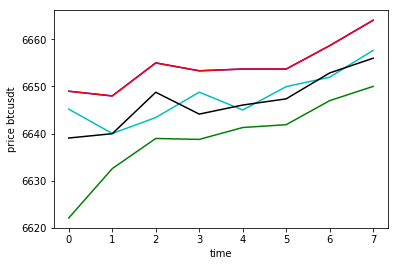

In [43]:
fig = plt.figure()
plt.plot(X[0,:,1], color="b")
plt.plot(X[0,:,1], color="r")
plt.plot(X[0,:,2], color="g")
plt.plot(X[0,:,3], color="c")
plt.plot(X[0,:,4], color="k")
plt.xlabel("time")
plt.ylabel("price {}".format(SYMBOL))
plt.show()

## Normalise the data

We now have the normalise the timeseries data before enterrring the training loop.

### 1. Mean and Std normalisation

Compute the mean $\mu$ and standard deviation $\sigma$ of the batch.

Rescale the dataset as:

$$ X_{norm} = \frac{X - \mu}{\sigma} $$

In [44]:
# Compute the mean.
mean = X.mean(axis=0)
# Compute the standard deviation.
std = X.mean(axis=0)
# Normalise the data.
X_norm = ( X - mean ) / ( std + 1.0E-8 )

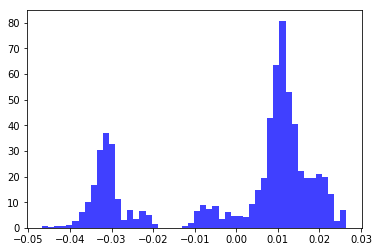

In [45]:
# Histogram.
hist1 = plt.hist(X_norm[:,:,0].reshape(-1, 1), 50, density=True, facecolor="b", alpha=0.75)

### 2. Uniform normalisation

Compute the minimum and maximum for each timeseries sample.

Rescale the dataset as:

$$ X_{norm} = \frac{ (X - \max(X) + X - \min(X)}{\max(X) - \min(X)} $$

In [46]:
# Compute the maximum and minimum.
X_max = np.max(X, axis=1, keepdims=True)
X_min = np.min(X, axis=1, keepdims=True)

# Normalise the data.
X_norm = ( X - X_min ) / ( X_max - X_min )

# Display shapes.
print("X_norm shape = {}".format(X_norm.shape))
print("X_max shape  = {}".format(X_max.shape))
print("X_min shape  = {}".format(X_min.shape))

# Display the max and mins.
print("X_max = {}".format(X_max[0]))
print("X_min = {}".format(X_min[0]))

X_norm shape = (1950, 8, 6)
X_max shape  = (1950, 1, 6)
X_min shape  = (1950, 1, 6)
X_max = [[6.65197000e+03 6.66405000e+03 6.65002000e+03 6.65767000e+03
  6.65599581e+03 5.36584443e-01]]
X_min = [[ 6.62657000e+03  6.64800000e+03  6.62213000e+03  6.64003000e+03
   6.63907452e+03 -7.18652981e-02]]


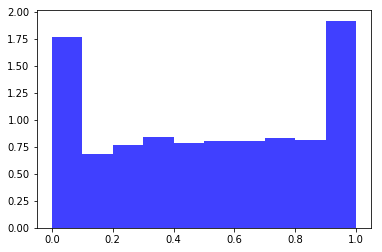

In [51]:
# Histogram.
hist1 = plt.hist(X_norm[:,:,0].reshape(-1, 1), 10, density=True, facecolor="b", alpha=0.75)

In [48]:
print(X_norm[0])


[[0.         0.0623053  0.         0.2930839  0.         0.56215912]
 [0.73385827 0.         0.37504482 0.         0.05408823 0.47391224]
 [0.52992126 0.43613707 0.6041592  0.19160998 0.57343731 1.        ]
 [0.66377953 0.33208723 0.59698817 0.49716553 0.29966241 0.08423808]
 [0.92244094 0.35514019 0.68734313 0.28287982 0.41331672 0.4041402 ]
 [0.72637795 0.35514019 0.70885622 0.56349206 0.49068147 0.93734034]
 [0.83897638 0.66417445 0.89171746 0.67687075 0.81534091 0.        ]
 [1.         1.         1.         1.         1.         0.63161672]]
